Mortgage Insurance companies of USA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter('ignore',DeprecationWarning)
import seaborn as sns
import time
from pandas_datareader import data
import pandas_datareader.data as web
import datetime

In [2]:
#National MI 
nmih = pd.read_csv('NMIH.csv')
nmih['Date'] = pd.to_datetime(nmih['Date'])
nmih.set_index('Date',inplace=True)

# Arch MI (includes entire Arch capital group stock)
archMI = pd.read_csv('ACGL.csv')
archMI['Date'] = pd.to_datetime(archMI['Date'])
archMI.set_index('Date',inplace=True)

# Radian
radian = pd.read_csv('RDN.csv')
radian['Date'] = pd.to_datetime(radian['Date'])
radian.set_index('Date',inplace=True)


# Genworth
genworth = pd.read_csv('GNW.csv')
genworth['Date'] = pd.to_datetime(genworth['Date'])
genworth.set_index('Date',inplace=True)


# MGIC Mortgage Guaranty Insurance Corporation.
mgic = pd.read_csv('MTG.csv')
mgic['Date'] = pd.to_datetime(mgic['Date'])
mgic.set_index('Date',inplace=True)

In [3]:
nmih.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1122.000000,1122.000000,1122.000000,1122.000000,1122.000000,1.122000e+03
mean,10.039075,10.198873,9.863716,10.026003,10.026003,3.904010e+05
std,3.437619,3.509564,3.364180,3.431872,3.431872,5.916270e+05
min,4.380000,4.660000,4.190000,4.410000,4.410000,2.300000e+03
25%,7.740000,7.852500,7.630000,7.750000,7.750000,1.460000e+05
50%,9.405000,9.540000,9.240000,9.390000,9.390000,2.613500e+05
75%,11.650000,11.807500,11.447500,11.650000,11.650000,4.338500e+05
max,21.650000,21.924000,21.250000,21.700001,21.700001,1.198610e+07


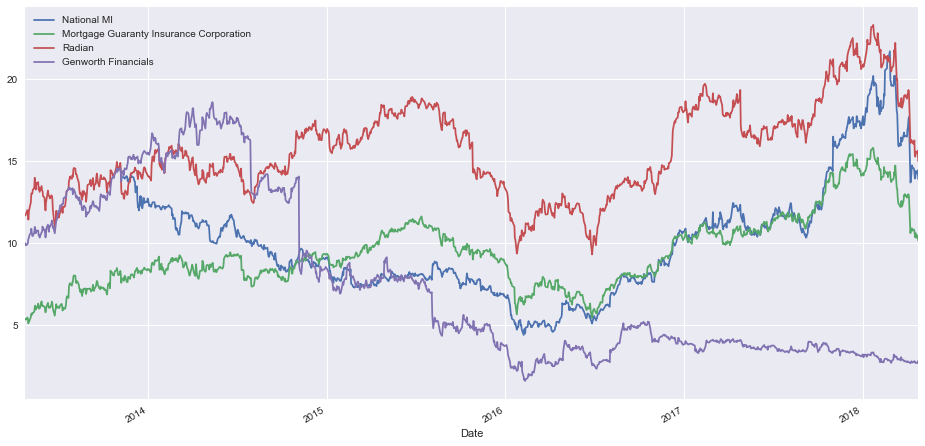

In [4]:
nmih['Close'].plot(figsize=(16,8), label="National MI")
mgic['Close'].plot(label="Mortgage Guaranty Insurance Corporation")
#archMI['Close'].plot(label="Arch Capital")
radian['Close'].plot(label="Radian")
genworth['Close'].plot(label="Genworth Financials")
plt.legend()
plt.show()

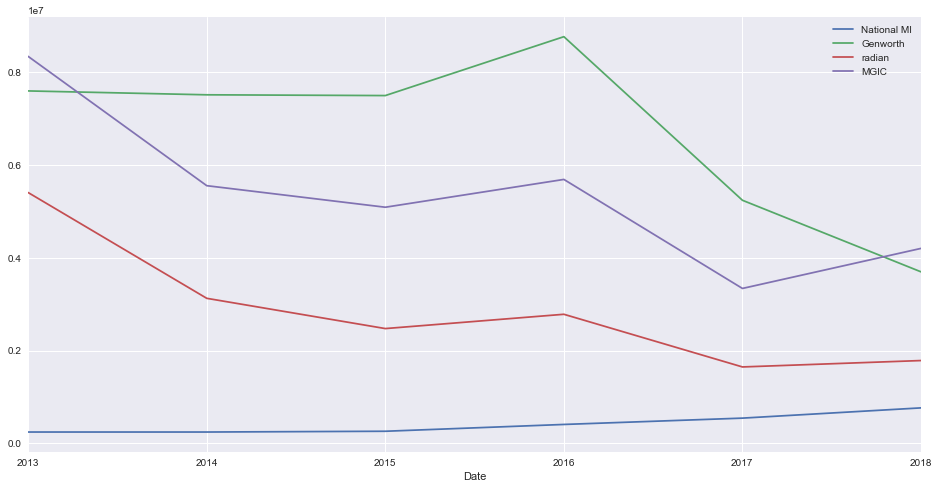

In [16]:
nmih['Volume'].resample('A').mean().plot(label='National MI',figsize=(16,8))
genworth['Volume'].resample('A').mean().plot(label='Genworth')
radian['Volume'].resample('A').mean().plot(label='radian')
mgic['Volume'].resample('A').mean().plot(label='MGIC')
plt.legend()
plt.show()

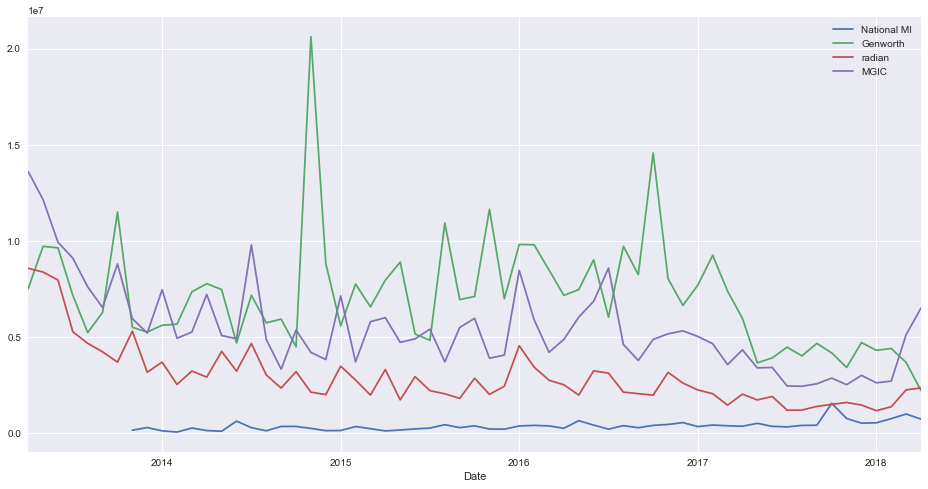

In [17]:
nmih['Volume'].resample('M').mean().plot(label='National MI',figsize=(16,8))
genworth['Volume'].resample('M').mean().plot(label='Genworth')
radian['Volume'].resample('M').mean().plot(label='radian')
mgic['Volume'].resample('M').mean().plot(label='MGIC')
plt.legend()
plt.show()

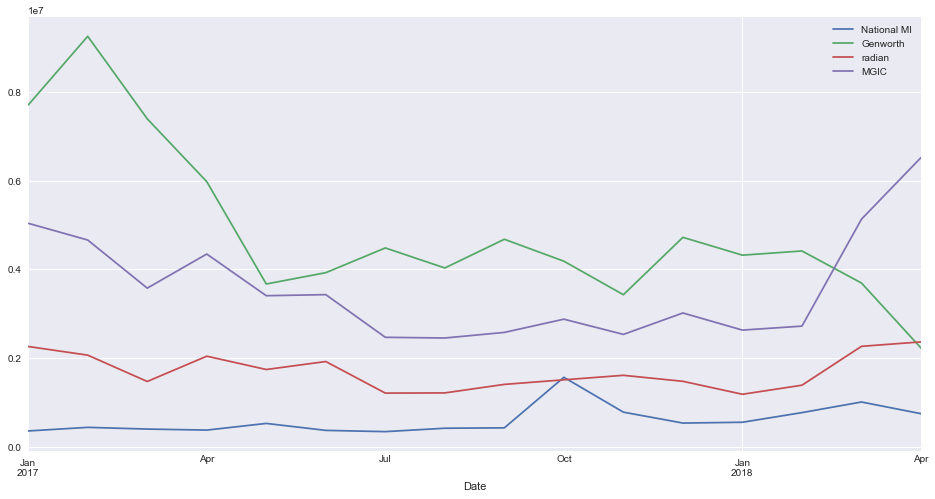

In [18]:
nmih['Volume']['2017-01-01':].resample('M').mean().plot(label='National MI',figsize=(16,8))
genworth['Volume']['2017-01-01':].resample('M').mean().plot(label='Genworth')
radian['Volume']['2017-01-01':].resample('M').mean().plot(label='radian')
mgic['Volume']['2017-01-01':].resample('M').mean().plot(label='MGIC')
plt.legend()
plt.show()

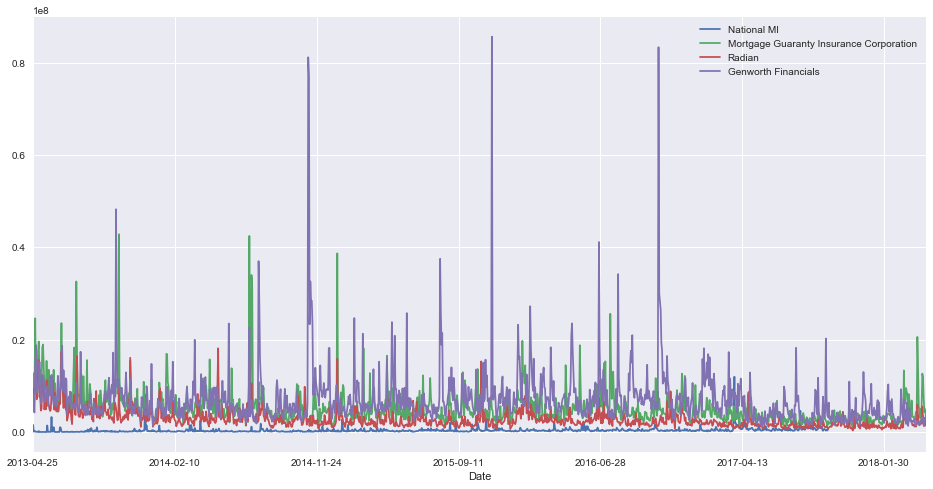

In [32]:
nmih['Volume'].plot(figsize=(16,8), label="National MI")
mgic['Volume'].plot(label="Mortgage Guaranty Insurance Corporation")
radian['Volume'].plot(label="Radian")
genworth['Volume'].plot(label="Genworth Financials")
plt.legend()
plt.show()

In [34]:
nmih['returns'] = nmih['Close'].pct_change()
mgic['returns'] = mgic['Close'].pct_change()
radian['returns'] = radian['Close'].pct_change()
genworth['returns'] = genworth['Close'].pct_change()

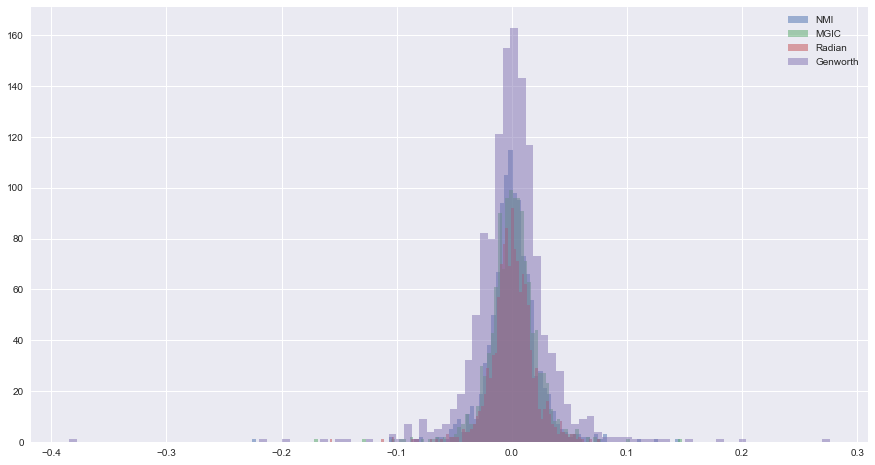

In [36]:
nmih['returns'].hist(bins=100, figsize=(15,8), alpha=0.5, label='NMI')
mgic['returns'].hist(bins=100, alpha=0.5,label='MGIC')
radian['returns'].hist(bins=100, alpha=0.5, label='Radian')
genworth['returns'].hist(bins=100, alpha=0.5,label='Genworth')
plt.legend()

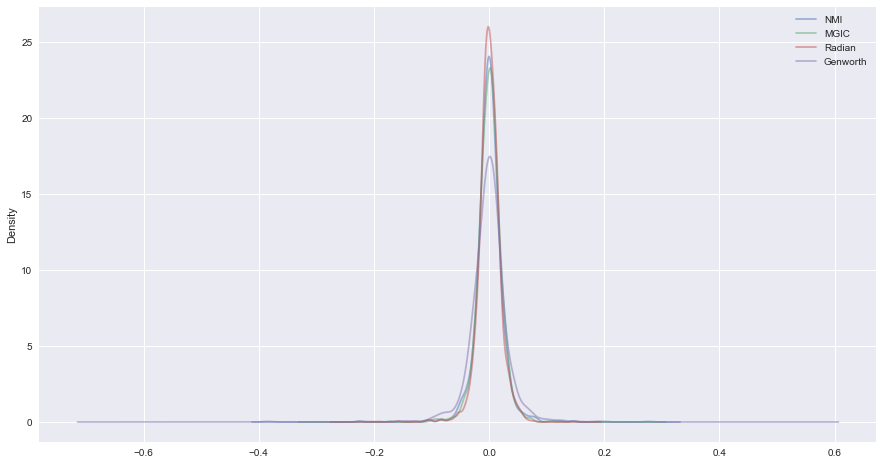

In [38]:
nmih['returns'].plot(kind='kde', figsize=(15,8), alpha=0.5,label='NMI')
mgic['returns'].plot(kind='kde', alpha=0.5,label='MGIC')
radian['returns'].plot(kind='kde', alpha=0.5,label='Radian')
genworth['returns'].plot(kind='kde', alpha=0.5,label='Genworth')
plt.legend()
plt.show()

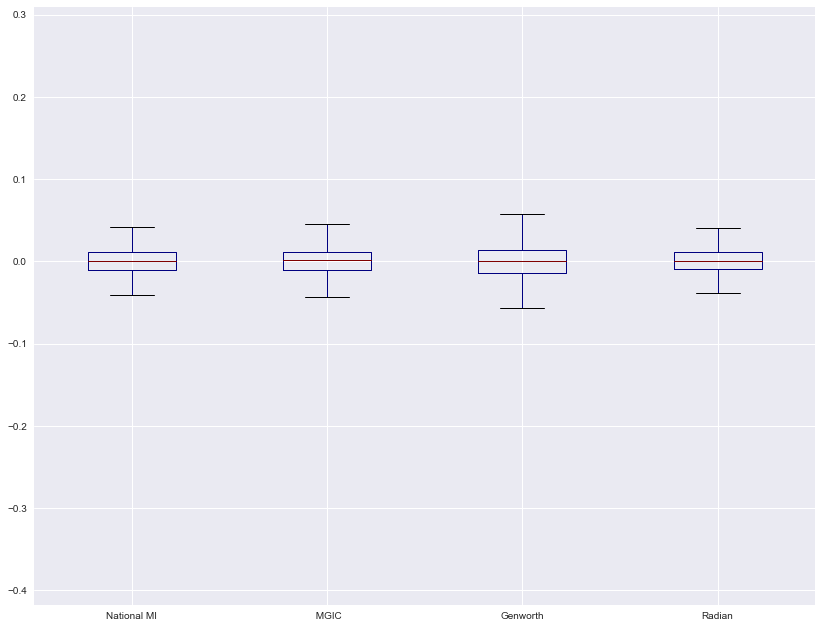

In [40]:
box_df = pd.concat([nmih['returns'],mgic['returns'],genworth['returns'],radian['returns']],axis=1)
box_df.columns = ['National MI',' MGIC','Genworth','Radian']
box_df.plot(kind='box',figsize=(14,11),colormap='jet')

In [42]:
nmih['Cumulative Return'] = (1 + nmih['returns']).cumprod()
radian['Cumulative Return'] = (1 + radian['returns']).cumprod()
genworth['Cumulative Return'] = (1 + genworth['returns']).cumprod()
mgic['Cumulative Return'] = (1 + mgic['returns']).cumprod()


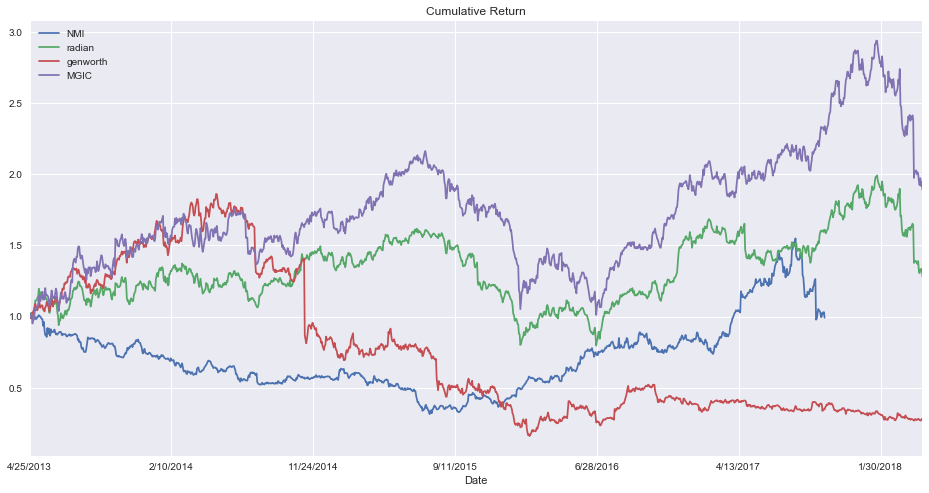

In [43]:
nmih['Cumulative Return'].plot(label='NMI',figsize=(16,8),title='Cumulative Return')
radian['Cumulative Return'].plot(label='radian')
genworth['Cumulative Return'].plot(label='genworth')
mgic['Cumulative Return'].plot(label='MGIC')
plt.legend()